
# LOAD NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


# LOADING DATASET INTO DATAFRAME

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv',encoding='Latin2')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# DATA PREPROCESSING

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.drop(['Name'],axis=1,inplace=True)
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df["Year"]=df["Year"].str.replace(r'\(|\)','',regex=True).astype(int)
df["Duration"]=pd.to_numeric(df["Duration"].str.replace('min','',))
df["Votes"]=pd.to_numeric(df["Votes"].str.replace(',',''))
df



,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df.dtypes

,0
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# DATA VISUALIZATION

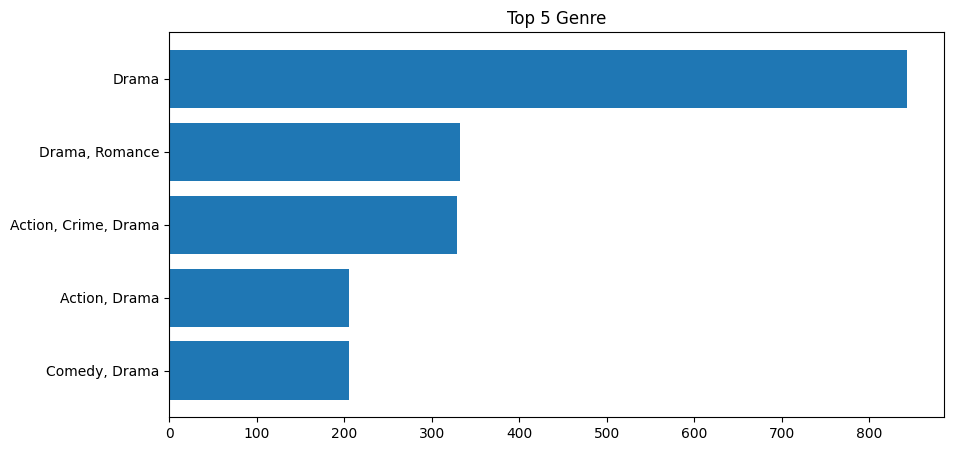

In [ ]:
top_5_genre= df['Genre'].value_counts(ascending=True).tail(5)
plt.figure(figsize=(10, 5))
plt.barh(top_5_genre.index,top_5_genre.values)
plt.title('Top 5 Genre')
plt.show()

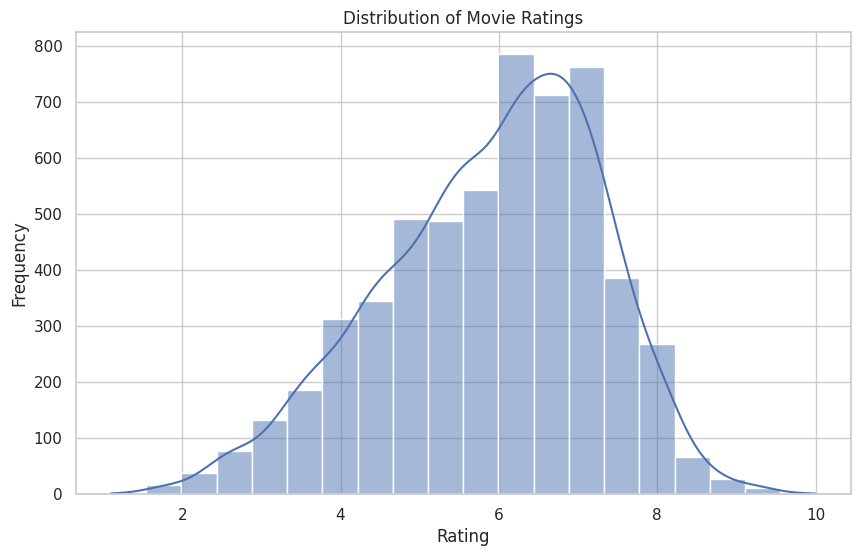

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

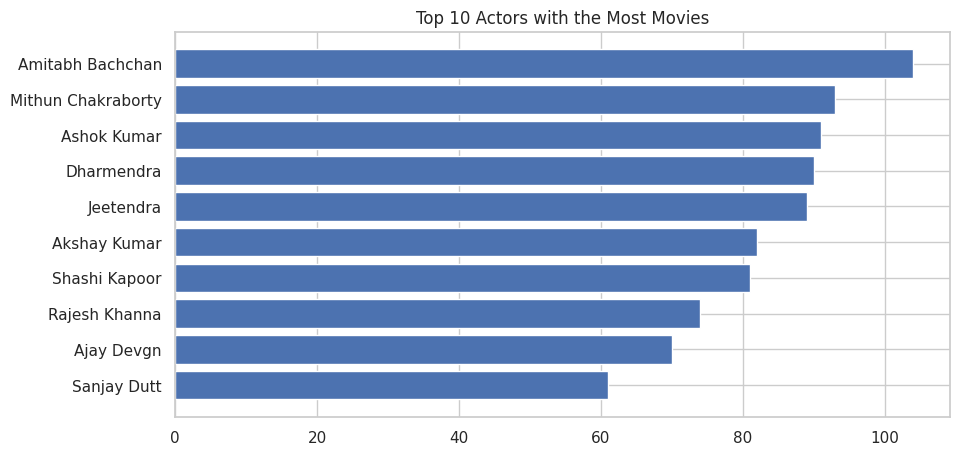

In [ ]:
top_10_actors = df['Actor 1'].value_counts(ascending=True).tail(10)
plt.figure(figsize=(10, 5))
plt.barh(top_10_actors.index, top_10_actors.values)
plt.title('Top 10 Actors with the Most Movies')
plt.show()

# CONVERTING CATEGORICAL TO NUMERIC USING LABEL ENCORDING

In [ ]:
encoder=LabelEncoder()
df['Genre']=encoder.fit_transform(df['Genre'])
df['Actor 1']=encoder.fit_transform(df['Actor 1'])
df['Director']=encoder.fit_transform(df['Director'])
df['Actor 2']=encoder.fit_transform(df['Actor 2'])
df['Actor 3']=encoder.fit_transform(df['Actor 3'])
df


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,2015,115,229,6.1,408,1223,1861,1801,1615
15494,2001,153,133,6.2,1496,2059,763,1619,1184
15503,1989,125,28,5.8,44,1793,406,754,1685
15505,1999,129,38,4.5,655,1025,112,2164,314


# CREATING NEW FEATURES

In [ ]:
genre_avg_rating=df.groupby('Genre')['Rating'].transform('mean')
df['genre_avg_rating']=genre_avg_rating
director_avg_rating=df.groupby('Director')['Rating'].transform('mean')
df['director_avg_rating']=director_avg_rating
actor1_avg_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_avg_rating']=actor1_avg_rating
actor2_avg_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2_avg_rating']=actor2_avg_rating
actor3_avg_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3_avg_rating']=actor3_avg_rating
df



,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating
1,2019,109,229,7.0,8,629,1352,2272,319,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,184,4.4,35,1335,1198,719,2148,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,157,4.7,827,1530,378,75,2045,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,289,7.4,1086,2044,692,1112,2524,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,320,5.6,326,135,1934,1175,1013,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,229,6.1,408,1223,1861,1801,1615,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,133,6.2,1496,2059,763,1619,1184,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,28,5.8,44,1793,406,754,1685,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,38,4.5,655,1025,112,2164,314,5.516505,5.225000,5.481707,4.640000,5.737500


In [ ]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating
1,2019,109,229,7.0,8,629,1352,2272,319,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,184,4.4,35,1335,1198,719,2148,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,157,4.7,827,1530,378,75,2045,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,289,7.4,1086,2044,692,1112,2524,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,320,5.6,326,135,1934,1175,1013,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,229,6.1,408,1223,1861,1801,1615,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,133,6.2,1496,2059,763,1619,1184,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,28,5.8,44,1793,406,754,1685,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,38,4.5,655,1025,112,2164,314,5.516505,5.225000,5.481707,4.640000,5.737500


In [ ]:
y=df['Rating']
X=df.drop(['Rating'],axis=1)

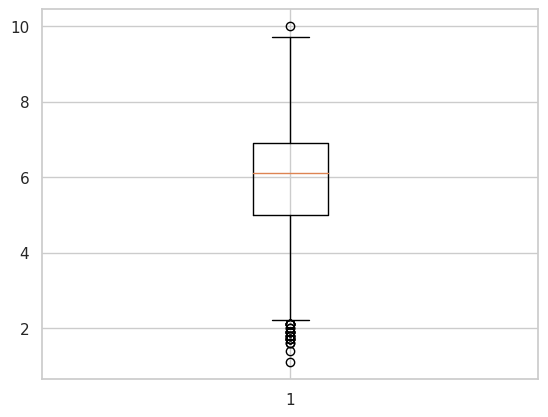

In [ ]:
plt.boxplot(y)
plt.show()

# REMOVING OUTLIERS

> Add blockquote



In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year                     30.000000
Duration                 31.000000
Genre                   201.000000
Rating                    1.900000
Votes                   892.500000
Director               1156.000000
Actor 1                1004.000000
Actor 2                1150.500000
Actor 3                1216.000000
genre_avg_rating          0.899016
director_avg_rating       1.473171
actor1_avg_rating         1.266032
actor2_avg_rating         1.318182
actor3_avg_rating         1.275000
dtype: float64


In [ ]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [ ]:
print(f"Number of NaN values in 'rating': {df['Rating'].isnull().sum()}")

Number of NaN values in 'rating': 0


In [ ]:
df = df.dropna(subset=['Rating'])

In [ ]:
outliers=df[(df["Rating"]<lower["Rating"])|(df["Rating"]>upper["Rating"])]
outliers

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating
1473,2017,125,229,2.1,419,1959,1552,911,1977,6.415521,4.000000,4.200000,2.100000,2.100000
1488,2020,143,22,2.1,10309,85,1800,1647,2118,4.785714,3.675000,3.450000,4.360000,5.080000
2918,2011,150,3,1.7,624,90,1496,131,266,5.624324,3.140000,5.260656,3.784615,5.498039
3618,2008,140,77,1.4,3899,782,731,618,787,5.588571,3.875000,1.400000,4.233333,4.566667
4170,2013,137,316,1.9,128,2358,1798,1933,1280,4.648649,3.650000,1.900000,3.500000,1.900000
5114,2000,123,192,2.1,23,1626,792,526,1521,5.208333,2.100000,4.100000,2.100000,2.100000
5523,2008,90,152,1.9,314,1578,854,726,1966,6.134000,1.900000,1.900000,5.014815,5.733333
5711,2013,150,19,1.7,8186,1839,87,2114,1134,5.477966,4.060000,5.322857,3.233333,3.900000
5915,2003,135,229,1.7,27,1427,955,1959,606,6.415521,1.700000,1.700000,1.700000,4.133333
5933,2014,159,159,1.8,7840,1839,1460,1647,1713,5.765957,4.060000,5.533333,4.360000,5.150000


# SCALING THE ATTRIBUTES

In [ ]:
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
X

array([[ 1.15259982, -0.96529788,  0.52931791, ...,  0.917407  ,
         1.03847403,  1.02741532],
       [ 1.15259982, -0.92579983,  0.11341838, ..., -0.46140323,
        -1.41283249, -1.35114872],
       [ 0.03811683,  0.53562827, -0.13612133, ..., -1.06992243,
        -0.10546901, -0.0240711 ],
       ...,
       [-0.36714972, -0.33332898, -1.32836665, ...,  0.39451232,
        -0.09289821,  0.14128362],
       [ 0.13943346, -0.17533675, -1.23594453, ..., -0.40190485,
        -1.18655804, -0.15020707],
       [ 0.08877514, -0.1358387 , -1.23594453, ...,  0.02712627,
        -0.20003573, -0.04527043]])

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


# CREATING MODELS AND CHECKING PERFORMANCE

In [ ]:
mlr=LinearRegression()
knn=KNeighborsRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
model=[mlr,knn,svr,dtr,rfr,gbr,abr]
for i in model:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print("r2_score:",r2_score(y_test,y_pred))
  print("mean_squared_error:",mean_squared_error(y_test,y_pred))
  print("mean_absolute_error",np.sqrt(mean_absolute_error(y_test,y_pred)))
  print("/"*70)

LinearRegression()
r2_score: 0.7764607147200192
mean_squared_error: 0.41357372526869024
mean_absolute_error 0.6885132860256729
//////////////////////////////////////////////////////////////////////
KNeighborsRegressor()
r2_score: 0.730892192619451
mean_squared_error: 0.49788080094228504
mean_absolute_error 0.7286659478830064
//////////////////////////////////////////////////////////////////////
SVR()
r2_score: 0.7985190818528616
mean_squared_error: 0.37276317576260287
mean_absolute_error 0.6625106347668419
//////////////////////////////////////////////////////////////////////
DecisionTreeRegressor()
r2_score: 0.6204453879832436
mean_squared_error: 0.7022202591283863
mean_absolute_error 0.7605171509354028
//////////////////////////////////////////////////////////////////////
RandomForestRegressor()
r2_score: 0.8094899269787835
mean_squared_error: 0.35246583392226144
mean_absolute_error 0.6337308900388234
//////////////////////////////////////////////////////////////////////
GradientBoos

In [ ]:
mdl=["LinearRegression", "KNeighborsRegressor", "SVR", "DecisionTreeRegressor", "RandomForestRegressor", "GradientBoostingRegressor", "AdaBoostRegressor"]
r2_score=[0.77646,0.73089,0.79851,0.62044,0.80948,0.80938,0.73212]
plt.figure(figsize=(7,7))


<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [ ]:
print(mdl)
print(r2_score)

['LinearRegression', 'KNeighborsRegressor', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor']
[0.77646, 0.73089, 0.79851, 0.62044, 0.80948, 0.80938, 0.73212]


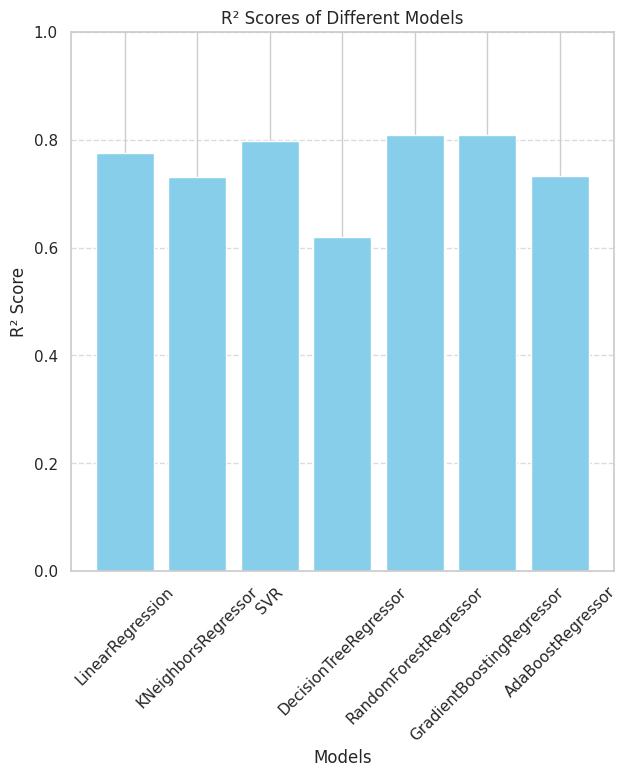

In [ ]:
plt.figure(figsize=(7, 7))
plt.bar(mdl, r2_score, color='skyblue')
plt.title('R² Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()